## Observations and Insights 

In [ ]:
#Observations:
    #Mouse b128's tumor reduced in size as time progressed. 

    #Based off the box plot, Capomulin and Ramicane had less variance since their boxes were much smaller compared to Infubinol and Ceftamin.

    #There seems to be a positive correlation between tumor volume and the mice's weight. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
datasheet_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
datasheet_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Checking the number of mice.
datasheet_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#datasheet_df.duplicated("Mouse ID", keep="first")

duplicate_df = datasheet_df.loc[datasheet_df.duplicated(["Mouse ID", "Timepoint"], keep="first")]
#duplicate_df

mouse_ids = duplicate_df['Mouse ID'].unique().tolist()
#mouse_ids
#mouse G989 is duplicate

duplicate_ids = datasheet_df.loc[datasheet_df['Mouse ID'].isin(mouse_ids)]
#duplicate_ids

duplicate_index = duplicate_ids.index
#print(duplicate_index)
# these are the duplicates

final_df = datasheet_df.drop(labels=duplicate_index)
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#duplicate_ids = datasheet_df.loc[datasheet_df['Mouse ID'].isin(mouse_ids)]
duplicate_ids


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#final_df = datasheet_df.drop(labels=duplicate_index)
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
final_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_final_df = final_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')

final_df_mean = grouped_final_df.mean()['Tumor Volume (mm3)']
final_df_median = grouped_final_df.median()['Tumor Volume (mm3)']
final_df_var = grouped_final_df.var()['Tumor Volume (mm3)']
final_df_stdev = grouped_final_df.std()['Tumor Volume (mm3)']
final_df_sem = grouped_final_df.sem()['Tumor Volume (mm3)']

drug_tumor_df = pd.DataFrame({
    "Mean of Tumor Volume (mm3)": final_df_mean,
    "Median of Tumor Volume (mm3)": final_df_median,
    "Variance of Tumor Volume (mm3)": final_df_var,
    "Standard Deviation of Tumor Volume (mm3)": final_df_stdev,
    "SEM of Tumor Volume (mm3)": final_df_sem
}) 
drug_tumor_df



,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = grouped_final_df.agg(['mean','median','var','std','sem'])
#aggregate_df

aggregate_df = aggregate_df.rename(columns={
    'mean':'Mean of Tumor Volume',
    'median':'Median of Tumor Volume',
    'var':'Variance of Tumor Volume',
    'std':'Standard Deviation of Tumor Volume',
    'sem':'SEM of Tumor Volume'
})
aggregate_df

Tumor Volume (mm3)                         \
             Mean of Tumor Volume Median of Tumor Volume   
Drug Regimen                                               
Capomulin               40.675741              41.557809   
Ceftamin                52.591172              51.776157   
Infubinol               52.884795              51.820584   
Ketapril                55.235638              53.698743   
Naftisol                54.331565              52.509285   
Placebo                 54.033581              52.288934   
Propriva                52.320930              50.446266   
Ramicane                40.216745              40.673236   
Stelasyn                54.233149              52.431737   
Zoniferol               53.236507              51.818479   

                                                                          \
             Variance of Tumor Volume Standard Deviation of Tumor Volume   
Drug Regimen                                                               
Capomulin                   24.947764                           4.994774   
Ceftamin                    39.290177                           6.268188   
Infubinol                   43.128684                           6.567243   
Ketapril                    68.553577                           8.279709   
Naftisol                    66.173479                           8.134708   
Placebo                     61.168083                           7.821003   
Propriva                    43.852013                           6.622085   
Ramicane                    23.486704                           4.846308   
Stelasyn                    59.450562                           7.710419   
Zoniferol                   48.533355                           6.966589   

                                  
             SEM of Tumor Volume  
Drug Regimen                      
Capomulin               0.329346  
Ceftamin                0.469821  
Infubinol               0.492236  
Ketapril                0.603860  
Naftisol                0.596466  
Placebo                 0.581331  
Propriva                0.544332  
Ramicane                0.320955  
Stelasyn                0.573111  
Zoniferol               0.516398

## Bar and Pie Charts

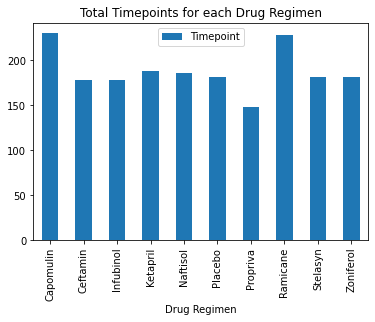

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_graph_df = final_df[['Timepoint', 'Drug Regimen']].groupby(['Drug Regimen']).count()
#bar_graph_df

bar_graph_df.plot.bar(title = "Total Timepoints for each Drug Regimen")

Text(0.5, 1.0, 'Total Timepoints for each Drug Regimen')

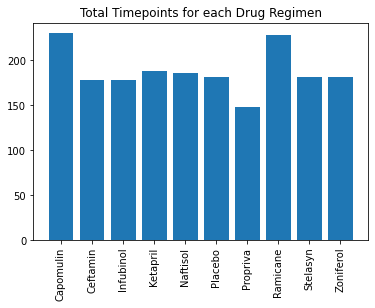

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = bar_graph_df.index.tolist()
y_axis = bar_graph_df['Timepoint']
plt.bar(x_axis, y_axis, align='center')
plt.xticks(x_axis, rotation=90)
plt.title("Total Timepoints for each Drug Regimen")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214DD5D2F98>],
      dtype=object)

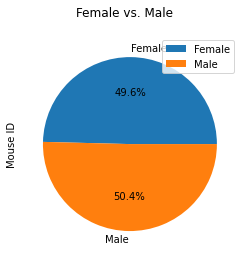

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_chart_df = final_df[['Sex', 'Mouse ID']].drop_duplicates(keep="first").groupby(['Sex']).count()
#pie_chart_df
pie_chart_df.plot.pie(subplots=True,autopct="%1.1f%%", title = "Female vs. Male")

([<matplotlib.patches.Wedge at 0x214de62a470>,
 [Text(0.015200833722885016, 1.1999037189100337, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.008867153005016259, 0.699943836030853, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

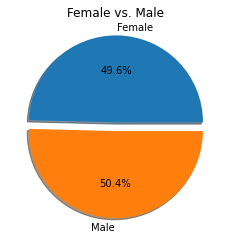

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = pie_chart_df.index.tolist()
y_axis = pie_chart_df['Mouse ID']
explode=(0.1,0)
plt.title('Female vs. Male')
plt.pie(y_axis, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_df = final_df[['Mouse ID', 'Timepoint']]
#drug_df

# Start by getting the last (greatest) timepoint for each mouse
drug_df = drug_df.groupby('Mouse ID').max()
#drug_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_merge = pd.merge(drug_df, final_df, on='Mouse ID')
#drug_merge

timepoint_test = drug_merge['Timepoint_x']==drug_merge['Timepoint_y']
final_volume = drug_merge.loc[timepoint_test]
#final_volume

final_volume = final_volume[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)']]
final_volume


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,a203,Infubinol,67.973419
19,a251,Infubinol,65.525743
29,a262,Placebo,70.717621
39,a275,Ceftamin,62.999356
46,a366,Stelasyn,63.440686
...,...,...,...
1839,z435,Propriva,48.710661
1849,z578,Ramicane,30.638696
1859,z581,Infubinol,62.754451
1869,z795,Naftisol,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    loop_df = final_volume.loc[final_volume['Drug Regimen']==drug]
    tumor_volume = loop_df['Tumor Volume (mm3)']
    volume.append(tumor_volume)
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    
    low_quartile = quartiles[0.25]
    median = quartiles[0.5]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile-low_quartile
    
    print(f'{drug}')
    print(f'The lower quartile is {low_quartile}. ')
    print(f'The median is {median}. ')
    print(f'The upper quartile is {upper_quartile}. ')
    print(f'The interquartile range is {iqr}. ')
    
    lower_bound = low_quartile-(1.5*iqr)
    upper_bound = upper_quartile+(1.5*iqr)
    
    print(f'The lower bound is {lower_bound}. Vaules lower than {lower_bound} may be outliers.')
    print(f'The upper bound is {upper_bound}. Vaules higher than {upper_bound} may be outliers.')
    print('\n')
     

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
The lower quartile is 32.37735684. 
The median is 38.125164399999996. 
The upper quartile is 40.1592203. 
The interquartile range is 7.781863460000004. 
The lower bound is 20.70456164999999. Vaules lower than 20.70456164999999 may be outliers.
The upper bound is 51.83201549. Vaules higher than 51.83201549 may be outliers.


Ramicane
The lower quartile is 31.56046955. 
The median is 36.56165229. 
The upper quartile is 40.65900627. 
The interquartile range is 9.098536719999998. 
The lower bound is 17.912664470000003. Vaules lower than 17.912664470000003 may be outliers.
The upper bound is 54.30681135. Vaules higher than 54.30681135 may be outliers.


Infubinol
The lower quartile is 54.04860769. 
The median is 60.16518046. 
The upper quartile is 65.52574285. 
The interquartile range is 11.477135160000003. 
The lower bound is 36.83290494999999. Vaules lower than 36.83290494999999 may be outliers.
The upper bound is 82.74144559000001. Vaules higher than 82.74144559000001 may be ou

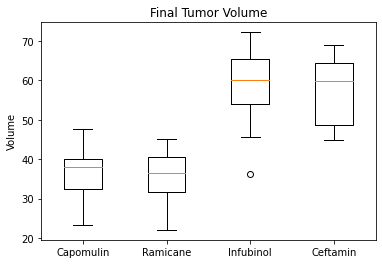

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Volume')
ax1.boxplot(volume)
plt.xticks([1,2,3,4],drugs)
plt.show()

## Line and Scatter Plots

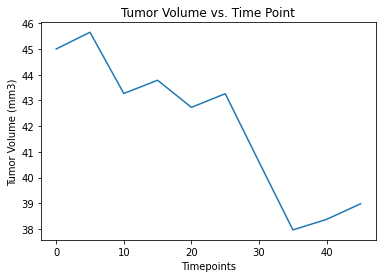

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#b128 -- mouse w/Capomulin
b128_df = final_df.loc[final_df['Mouse ID']=='b128']
x_axis = b128_df['Timepoint']
y_axis = b128_df['Tumor Volume (mm3)']
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point')
plt.plot(x_axis, y_axis)

Text(0, 0.5, 'Tumor Volume (mm3)')

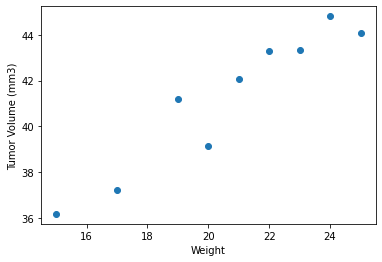

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = final_df.loc[final_df['Drug Regimen']=='Capomulin']
capomulin_df

capmoulin_group = capomulin_df[['Weight (g)', 'Tumor Volume (mm3)']].groupby(['Weight (g)'])
x_axis = capmoulin_group.mean().index
#x_axis
y_axis = capmoulin_group.mean()['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient is: 0.9505243961855271
y = 0.89x + 22.76


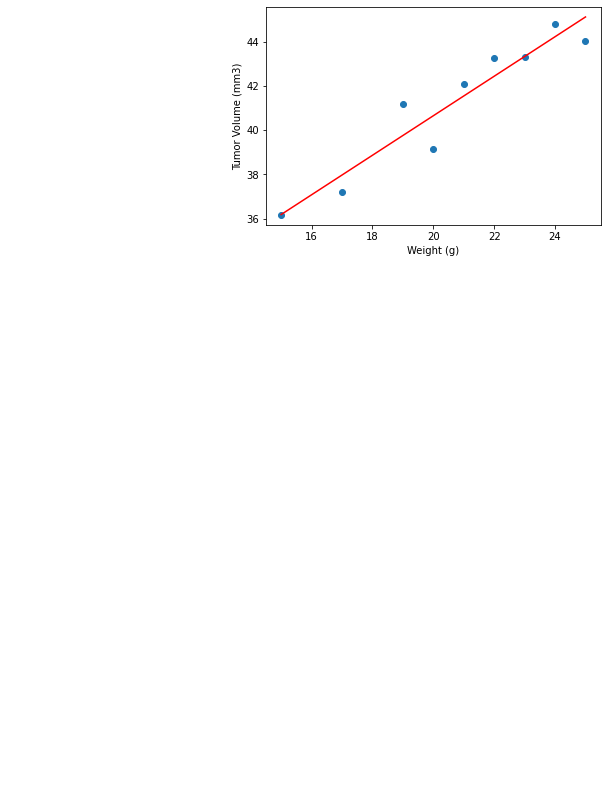

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = x_axis
y_values = y_axis

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {rvalue}")
print(line_eq)
plt.show()